# TP : Représentation et Visualisation de mots avec Word2Vec et t-SNE

Objectifs 
1. Extraire et tokeniser le texte d'un document PDF.
2. Représenter les mots de façon vectorielle (embeddings).
3. Visualiser ces représentations en 2D avec **t-SNE**.
4. Entraîner notre propre modèle Word2Vec et comparer avec un modèle pré-entraîné.
5. Ajouter une classification non supervisée pour faire apparaître des classes de mots.

Packages Nécessaires : 
```
pip install gensim
pip install matplotlib
pip install scikit-learn 
pip install nltk 
pip install PyMuPDF
```

In [1]:
import fitz
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import gensim.downloader as api
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from gensim.models import Word2Vec

/Users/axel/Desktop/TP_Embeddings_LLM/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Partie 1 : Extraction et Visualisation avec un modèle pré-entraîné

Dans cette première partie :
- Charger un fichier PDF
- Tokeniser le texte en mots
- Utiliser le modèle **Word2Vec Google News** pré-entraîné
- Réduire la dimension avec t-SNE
- Visualiser les mots en 2D


In [2]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/axel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# 1. Extraction du texte PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text("text")
    return text

In [4]:
# 2. Tokenisation simple
def tokenize(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha()]
    return tokens

In [5]:
# 3. Charger un modèle pré-entraîné (Google News)
model = api.load("word2vec-google-news-300")

In [6]:
# 4. Générér les Embeddings
def generates_embeddings(tokens):
    unique_tokens = list(set(tokens))
    embeddings = []
    words_in_model = []
    
    for word in unique_tokens:
        if word in model:
            embeddings.append(model[word])
            words_in_model.append(word)
    
    return embeddings, words_in_model

In [9]:
# 4. Pipeline
pdf_path = "../Data/cours_LLM.pdf"
text = extract_text_from_pdf(pdf_path)
tokens = tokenize(text)
embeddings, words_in_model = generates_embeddings(tokens)

In [26]:
embeddings

[array([-0.07714844,  0.10644531,  0.04223633, -0.00567627, -0.25585938,
        -0.00448608,  0.18164062,  0.23046875,  0.24902344, -0.06884766,
        -0.06054688, -0.09814453,  0.06347656,  0.08056641, -0.0625    ,
         0.11669922,  0.04589844, -0.01031494,  0.23046875,  0.00233459,
        -0.0177002 ,  0.02331543, -0.15429688, -0.13476562, -0.12158203,
        -0.10302734, -0.13867188, -0.02709961,  0.01953125,  0.03088379,
         0.05883789,  0.10009766, -0.09570312, -0.265625  , -0.23925781,
        -0.0390625 ,  0.09814453, -0.08007812,  0.21972656, -0.10791016,
         0.25195312,  0.00701904,  0.01043701, -0.0390625 , -0.16113281,
         0.04125977, -0.02734375,  0.06079102,  0.03198242,  0.01757812,
         0.20410156, -0.02941895, -0.09082031,  0.12988281, -0.12597656,
        -0.06689453, -0.03613281, -0.13964844,  0.11181641,  0.18261719,
        -0.13378906,  0.04174805, -0.13867188,  0.07861328,  0.09863281,
         0.06079102, -0.06591797,  0.08935547, -0.3

In [24]:
tokens

['large',
 'language',
 'models',
 'introduction',
 'modèles',
 'langage',
 'grande',
 'taille',
 'llm',
 'représentent',
 'avancée',
 'majeure',
 'domaine',
 'intelligence',
 'artificielle',
 'applications',
 'variées',
 'allant',
 'génération',
 'texte',
 'analyse',
 'sémantique',
 'traduction',
 'automatique',
 'appuyant',
 'architectures',
 'réseaux',
 'neuronaux',
 'notamment',
 'modèles',
 'transformers',
 'llm',
 'permettent',
 'traiter',
 'comprendre',
 'générer',
 'langage',
 'naturel',
 'manière',
 'performante',
 'cohérente',
 'explorerons',
 'principes',
 'fondamentaux',
 'fonctionnement',
 'llm',
 'sant',
 'bases',
 'entraînement',
 'massif',
 'corpus',
 'diversifiés',
 'mécanismes',
 'attention',
 'introduits',
 'transformers',
 'ainsi',
 'phases',
 'étudiant',
 'profondeur',
 'modèles',
 'comme',
 'gpt',
 'examinerons',
 'également',
 'architectures',
 'permettent',
 'llm',
 'capter',
 'complexités',
 'nuances',
 'langage',
 'humain',
 'verrons',
 'finalement',
 'comment

In [10]:
# 5. Réduction de dimension
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

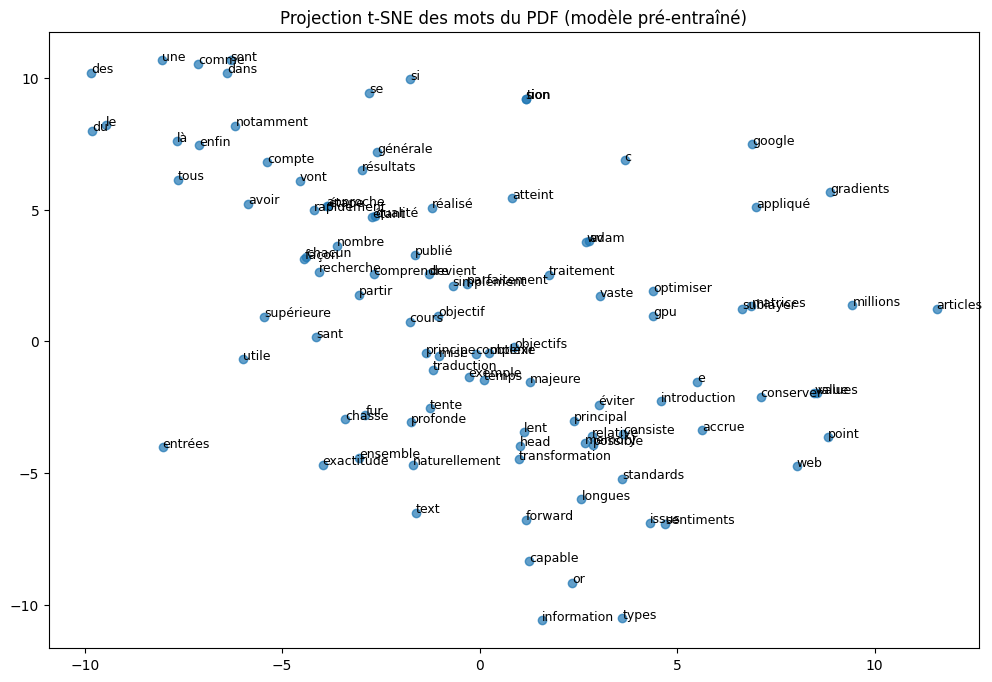

In [11]:
# 6. Visualisation
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:100, 0], embeddings_2d[:100, 1], alpha=0.7)
for i, word in enumerate(words_in_model[:100]):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=9)
plt.title("Projection t-SNE des mots du PDF (modèle pré-entraîné)")
plt.show()

## Partie 2 : Entraîner un modèle Word2Vec (CBOW) sur le PDF

Dans cette partie :
- Améliorer la tokenisation (enlever les stop words, ...) 
- Entraîner un modèle **Word2Vec CBOW** directement sur le contenu du PDF
- Visualiser les résultats

In [12]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/axel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# 1. Tokenisation + nettoyage
def tokenize_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha()]
    stop_words = set(stopwords.words("french"))
    tokens = [t for t in tokens if t not in stop_words]
    return tokens

In [14]:
# 2. Entraînement Word2Vec (CBOW)
def train_word2vec(tokens):
    model = Word2Vec(
        sentences=[tokens],
        vector_size=50,
        window=5,
        min_count=2,
        sg=0,   # CBOW
        workers=4,
        epochs=100
    )
    return model

In [15]:
# 3. Extraire embeddings
def get_embeddings(model, top_n=100):
    words = model.wv.index_to_key[:top_n]
    vectors = np.array([model.wv[w] for w in words])
    return words, vectors

In [16]:
# 4. Réduction et visualisation
def reduce_with_tsne(vectors, words):
    perplexity = min(30, len(words)-1)
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    return tsne.fit_transform(vectors)

In [17]:
def plot_embeddings(reduced, words, title="t-SNE (Word2Vec CBOW)"):
    plt.figure(figsize=(12, 8))
    plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.7)
    for i, word in enumerate(words):
        plt.annotate(word, (reduced[i, 0], reduced[i, 1]), fontsize=9)
    plt.title(title)
    plt.show()

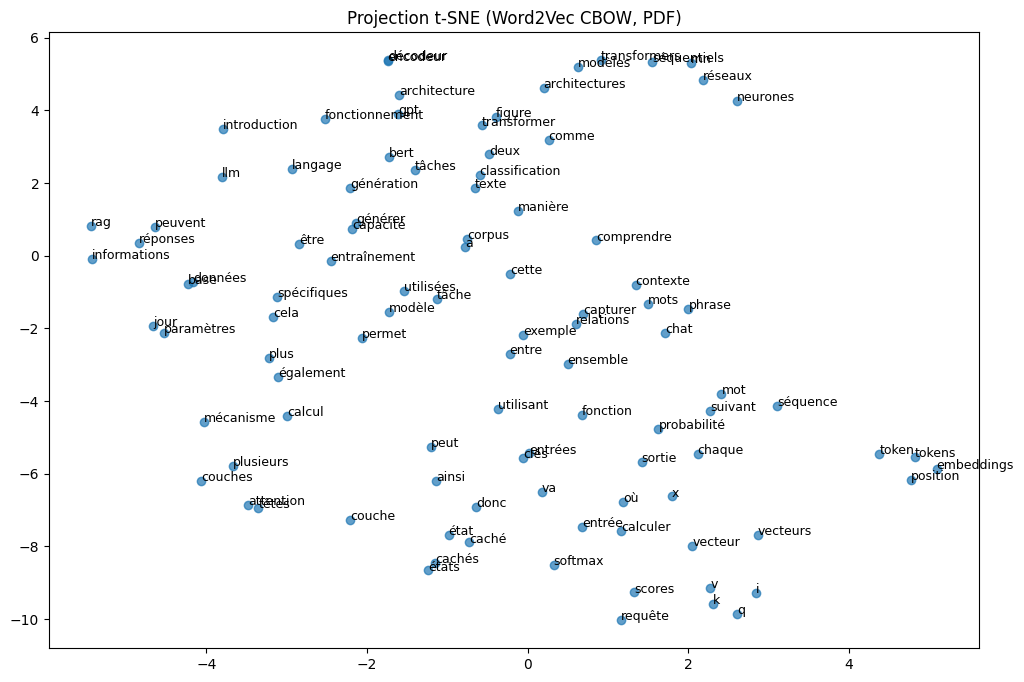

In [18]:
# Pipeline Finale
text = extract_text_from_pdf(pdf_path) 
tokens = tokenize_text(text)
model = train_word2vec(tokens)
words, vectors = get_embeddings(model, top_n=100)
reduced = reduce_with_tsne(vectors, words)
plot_embeddings(reduced, words, "Projection t-SNE (Word2Vec CBOW, PDF)")

## Partie 3 : Classification non supervisée des mots

Pour mieux comprendre la structure des mots :
- Entraînement d'un clustering **KMeans** sur les vecteurs Word2Vec


In [19]:
# 1. Clustering
def cluster_embeddings(vectors, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
    return kmeans.fit_predict(vectors)

In [20]:
# 2. Visualisation avec couleurs par cluster
def plot_embeddings_clusters(reduced, words, labels, title="t-SNE avec clustering"):
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap="tab10", alpha=0.7)
    for i, word in enumerate(words):
        plt.annotate(word, (reduced[i, 0], reduced[i, 1]), fontsize=9)
    plt.title(title)
    plt.colorbar(scatter, label="Cluster")
    plt.show()

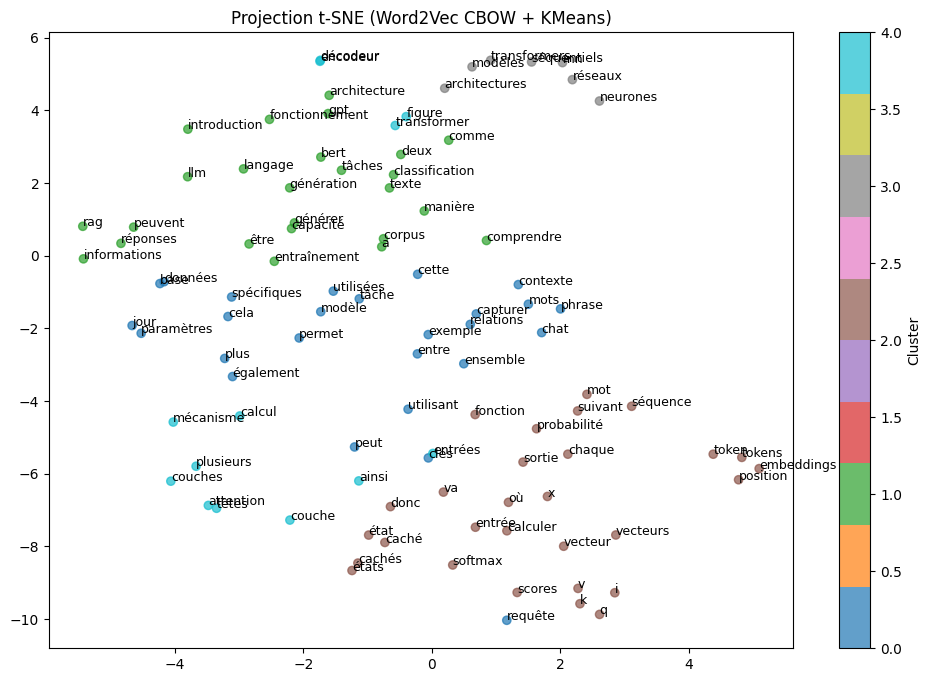

In [21]:
# Pipeline Finale
labels = cluster_embeddings(vectors, n_clusters=5)
plot_embeddings_clusters(reduced, words, labels, "Projection t-SNE (Word2Vec CBOW + KMeans)")